In [1]:
%pylab inline
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from writeit import *


Populating the interactive namespace from numpy and matplotlib


In [2]:
#run Wilson's algorithm to sample uniform spanning tree of a graph G
#see paper http://dl.acm.org/citation.cfm?id=237880
def randomSuccessor(u,Gl):
    '''return a random successor of node u in directed graph Gl
    notation: Gl = [n0,n1,...nn] where nk is a list of the k nodes connected to node k
    this version assumes all connections equally favorable (but in principle can run with 
    any weighted edges s.t. G is ''stochastic'', i.e. sum(weights leaving each nodes) =1
    '''
    n = len(Gl[u])#number of vertices connected with u. 
    z = np.random.randint(0,n) #assume all edges connected with equal weight...
    return Gl[u][z]
        
    

In [3]:
def randomTreeWithRoot(r,Gl):
    '''return random spanning tree with root vertex r of graph G = (u,e)
    represent this as an array of connectivities 
        conns = [[e0l, e0r],[e1l,elr]..]
    where the kth row =[ekl, ekr] is the left and right node of the kth edge  
    (left and right don't matter in algorithm but once I return a network I am picking a coordinate system for it)
    '''
    n = len(Gl)
    InTree = [False]*n
    Next= 17*np.ones((n),int)
    InTree[r] = True
    for i in range(n):
        u = i
        while not InTree[u]:
            p =randomSuccessor(u,Gl) 
            Next[u] = p
            u = Next[u]
        u = i
        while not InTree[u]:
            InTree[u] = True
            u = Next[u]
    g = arange(0,N)
    conns = np.ndarray((N-1,2),int)
    for k in range(N-1):
        conns[k,:] = (Next[k+1],g[k+1]) 
    return conns

In [4]:
#build an adjacency matrix with node connectivity <=3 for all nodes
def AdjMatrix3(N):
    done = False
    count =0
    while not done:
        count +=1
        A = np.zeros((N,N),int)
        A[0,1]=1
        for i in range(1,N):
            for j in range(i+1,N):
                r = np.random.randint(0,2)
                if (sum(A[i,:])+sum(A[:,i]))<3 and (i!=j):
                    A[i,j] = r
        A = (A+np.transpose(A))
        degpos =[sum(A[k,:])>0 for k in range(N)]
        if all(degpos)==True:
            done = True
    return A,count


In [5]:
def listRep(A):
    '''return list representation from adjacency matrix A
    returns L = [n0, n1,...nn] where nk is a list of the nodes connected to node k
    '''
    Gl = []
    N = shape(A)[0]
    for i in range(N):
        Gl.append(find(A[i,:]>0))
    return Gl
        

In [6]:
N = 10
Np = N-1
A,count = AdjMatrix3(N)
Gl = listRep(A)
print A
print Gl

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1]
 [0 1 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]]
[array([1]), array([0, 2, 3]), array([1, 9]), array([1, 4, 6]), array([3, 5, 6]), array([4, 6, 7]), array([3, 4, 5]), array([5, 8, 9]), array([7]), array([2, 7])]


In [67]:
A2 = np.ones((N,N))-np.diag(np.ones(N),0)
Gl2  = listRep(A2)
conns = randomTreeWithRoot(0,Gl)
c3 = [np.array([[0,1],[1,2],[6,3],[3,4],[2,5],[8,6],[6,7],[5,8],[5,9]]),
                np.array([[0,1],[1,2],[2,3],[2,4],[4,5],[3,6],[5,7],[1,8],[8,9]]),
                np.array([[0,1],[1,2],[5,3],[3,4],[2,5],[3,6],[2,7],[7,8],[8,9]]),
                np.array([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9]]),
                np.array([[0,1],[3,2],[1,3],[7,4],[2,5],[8,6],[6,7],[5,8],[7,9]]),
                np.array([[0,1],[6,2],[4,3],[6,4],[1,5],[5,6],[9,7],[2,8],[8,9]]),
                np.array([[0,1],[1,2],[1,3],[3,4],[2,5],[5,6],[6,7],[7,8],[7,9]])]
conns = c3[6]
nl = conns[:,0]
nr = conns[:,1]
nodeTypes = [sum(len(find(nl==k))+len(find(nr==k))) for k in range(N)]
print nodeTypes
print sum(nodeTypes)


[1, 3, 2, 2, 1, 2, 2, 3, 1, 1]
18


In [68]:
#N = 10
#for k in range(N-1):
#    conns[k,0] =k
#    conns[k,1] = k+1



conns = np.array([[0, 1],[1, 2],\
 [6, 3],\
 [2, 4],\
 [4, 5],\
 [5, 6],\
 [4, 7],\
 [7, 8],\
 [7, 9]])

(0.0, 250.0, -100.0, 600.0)

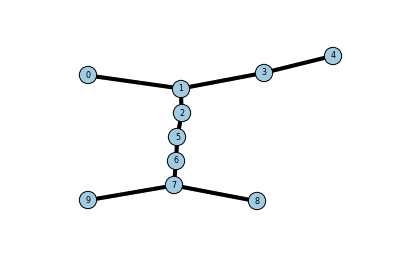

In [69]:
#colors = arrive
import networkx as nx
from matplotlib import cm
import matplotlib.colors as colors
G=nx.Graph()
for k in range(Np):
    G.add_edge('%d'%conns[k,0],'%d'%conns[k,1])
pos=nx.graphviz_layout(G) # positions for all nodes
# nodes
nx.draw_networkx_nodes(G,pos,node_size=300,node_color = '#A0CBE2', iter=500)
# edges
nx.draw_networkx_edges(G,pos,width=4,edge_cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(G,pos,width=4.0,alpha=0.3)
# labels
nx.draw_networkx_labels(G,pos,font_size=8,font_family='sans-serif')
plt.axis('off')

In [70]:
N = len(G.nodes())
xs =[]
ys = []
scale = 100
print pos['0']
for k in range(N):
    s = '%d'%k
    xs.append(scale*pos[s][0])
    ys.append(scale*pos[s][1])
print xs
print ys

(27.0, 412.29)
[2700.0, 9607.3, 9668.5, 15797.0, 20965.0, 9352.7, 9240.1, 9104.5, 15266.0, 2701.2]
[41229.0, 37123.0, 29318.0, 42040.0, 47390.0, 21872.0, 14449.0, 6738.8, 1800.0, 2121.3]


In [71]:
fn = '../indata/randomwithN%d'%N

IN = 0 #usually 0...?
m32gal = 264.172
Np = N-1
Nn = N
Ls = [20]*Np
Ns = [Ls[0]]*Np
Mrs = [0.007]*Np
Ds = [0.1]*Np
jt = nodeTypes
#reflect everything
bt = [1]*Nn
r = [1]*Nn
r[IN]=0
bv = [0]*Nn
bv[IN] = 0.0087
#orifices everywhere
#bt = [2]*Nn
#bt[0]=1
#bv = [Ds[0]/8.]*Nn
#r = [0]*Nn



h0s = [0.00]*Np
q0s = [0.00]*Np
T = 10.
Mi = 10
Nt = 20
Tmax = Nt*T

a = 100
dx = [Ls[i]/Ns[i] for i in range(Np)] 
M = int(T*a/(max(dx)*.8))

elevs = [0]*Nn
elevs[IN] =.1*Ls[0]
#for k in range(1,Nn):
#    elevs[k]+= -k*random.rand()
(fi, fc) = writePipes(fn,conns, xs,ys, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a, elevs)
print "M= %d"%M
tol = Ds[0] #tolerance for looking for arrival time
arrive = np.zeros((Np,Ns[0]))
maxH = np.zeros(Np)
Vsys = np.pi*Ds[0]**2/4.*sum(Ls)
print "system volume is %f gal "%(Vsys*m32gal)
Hs =np.zeros((M/Mi*Nt,sum(Ns)))
print shape(Hs)

../indata/fakeinp.inp
M= 1250
system volume is 373.464367 gal 
(2500, 180)


In [72]:
import time

n0=PyNetwork(fi,fc,1)
dt = T/float(M)
Q0 = 0.0087*np.ones(M+1)
#n0.setbVal(IN,Q0)
V0 = n0.getTotalVolume()
Vin =  0
Ttot = 0
count = 0
dHs = []
t0 = time.clock()
while count<Nt and Vin<Vsys:
    n0.runForwardProblem(dt)
    Vin  = n0.getTotalVolume()-V0
    for k in range(0,Np):
        for K in range(0,n0.Ns[k]):
            Ht = n0.pressureTimeSeries(k,K)#this function returns H in cell K of pipe k, at each time step
            Hs[count*M/Mi:(count+1)*(M/Mi),K+Ns[0]*k] =Ht[1::Mi] 
            maxH[k] = max(max(Ht),maxH[k])
            where = find(Ht>tol)
            if len(where)>0 and arrive[k,K]==0.:
                arrive[k,K] = Ttot+dt*(where[0])
    count+=1
    Ttot +=T
    dHs.append(mean([n0.getAveGradH(i) for i in range(M+1)]))
    print "T = %f, Volume = %f"%(Ttot, m32gal*Vin)
    n0.reset()
tf = time.clock()
print "inflow volume is %f gallons"%(Vin*m32gal)
print "simulation time is %f s"%Ttot
print "wall clock time is %f s"%(tf-t0)


T = 10.000000, Volume = 38.044203
T = 20.000000, Volume = 75.822494
T = 30.000000, Volume = 113.600785
T = 40.000000, Volume = 151.379076
T = 50.000000, Volume = 189.157367
T = 60.000000, Volume = 224.204903
T = 70.000000, Volume = 247.187956
T = 80.000000, Volume = 270.171058
T = 90.000000, Volume = 293.154161
T = 100.000000, Volume = 316.137267
T = 110.000000, Volume = 339.120373
T = 120.000000, Volume = 362.103479
T = 130.000000, Volume = 385.086592
inflow volume is 385.086592 gallons
simulation time is 130.000000 s
wall clock time is 14.238731 s


13
20
[2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22.982964
1.45771161323
125.36


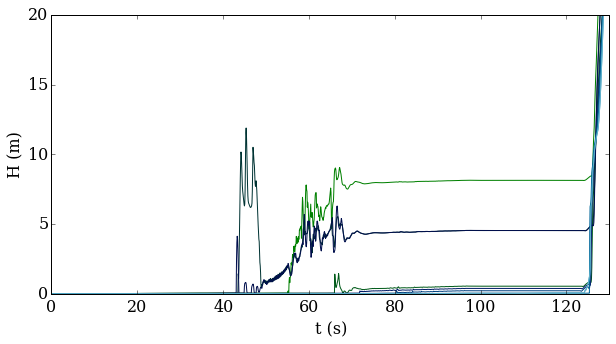

In [73]:
print count
print Nt
from matplotlib import cm
import matplotlib.colors as colors  
rc('font', family='serif',size= '16')

cNorm  = colors.Normalize(vmin=0, vmax=Np+1)
fig,ax = plt.subplots(figsize=(10,5))
sMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean'))
Hnew = Hs[0:M/Mi*count,:]
t = linspace(0,Ttot, shape(Hnew)[0])
#t = linspace(0,T,M+1)
for k in range(Np):
    K = Ns[k]-1
    Ht = n0.pressureTimeSeries(k,K)#this function returns H in cell K of pipe k, at each time step
    #plot(t,Ht, label = 'pipe %d'%k)
    plot(t,Hnew[:,(k+1)*Ns[0]-1],color = sMap.to_rgba(k), label = '%d'%k)
print elevs
print Q0[0]*T*m32gal
print Vin
print arrive.max()
ylim(0,20)
xlim(0,Ttot)
ax.set_xlabel('t (s)')
ax.set_ylabel('H (m)')
dH = mean(dHs)
name = 'output_data/random_networks/summary_N_%d_dH%.6f'%(Nn,dH)
savefig(name+'timeseries.png')
#legend(loc = 'upper left')

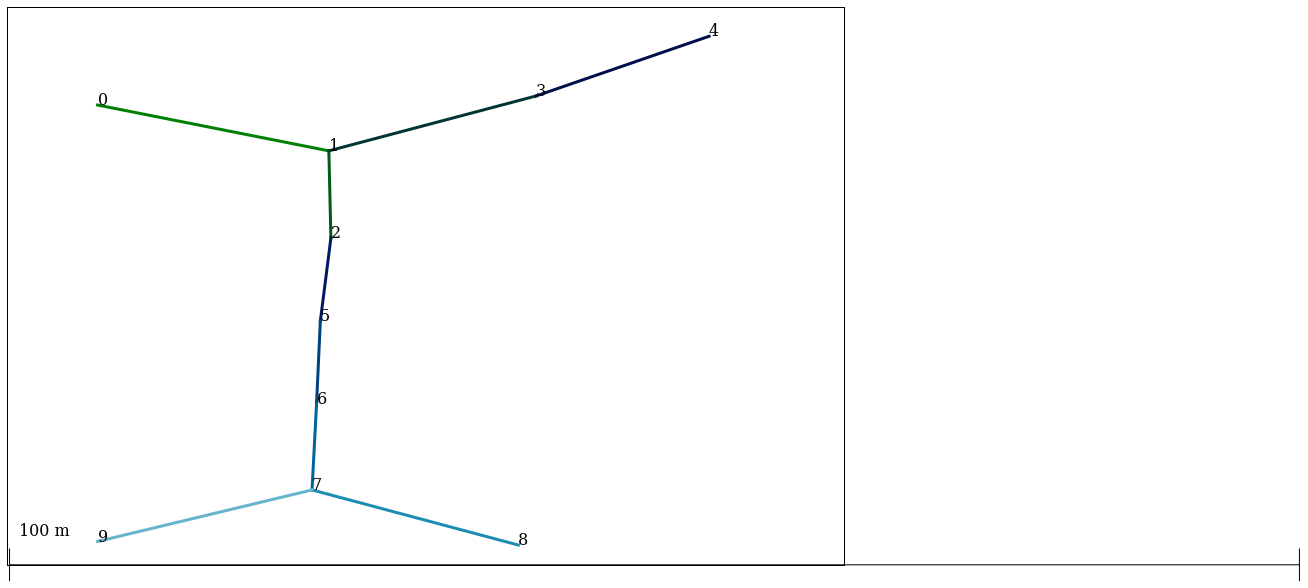

In [74]:
(xs,ys,conns,ls) = getBasicConnectivity(fi)
Np = shape(conns)[0]
plotNetworkLayout(xs,ys,conns,ls,Np)

output_data/random_networks/summary_N_10_dH2.594713.txt


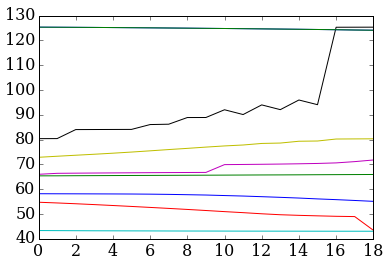

In [75]:
fs = name+'.txt'
with open(fs,'w') as f:
    f.write("Summary of Results and Parameters\n")
    f.write("dH/dx = %f, time average is %f\n"%(dH, dH/Ttot))
    f.write('max arrival time is %.5f\n'%(arrive.max()))
    f.write("Ttot = %f\n"%Ttot)
    f.write("Vin = %f m^3 \n"%Vin)
    f.write("tolerance for arrival time T_a is %f\n"%tol)
    f.write("pipe  leftend rightend    max(H)(m)  min(T_a) (s) max(T_a) (s) \n")
    for k in range(0,Np):
        plot(arrive[k,1:])
        m1 = min(arrive[k,:])
        m2 = max(arrive[k,:])
        f.write("%2d     %2d       %2d        %3.2f    %3.2f     %3.2f\n"%(k,conns[k,0], conns[k,1], maxH[k],m1,m2))
    f.write("\nconns = ")
    for k in range(Np):
        f.write("[%d,%d]\n" %(conns[k,0], conns[k,1]))
    f.write("\nelevs = \n")
    for k in range(len(elevs)):
        f.write("%d %f\n"%(k, elevs[k]))
    f.write("\nOther Params\n D = %f\n L  = %f\n N = %d\n Mr = %f\n Q0 = %f\n"%(Ds[0], Ls[0], Ns[0], Mrs[0], Q0[0]))
    f.write(" bt = %d, bv = %f, r = %f\n h0 = %f\n q0 = %f\n"%(bt[0], bv[0], r[1], h0s[0], q0s[0]))
    f.write(" T = %f, a = %f\n"%(T,a))
print fs

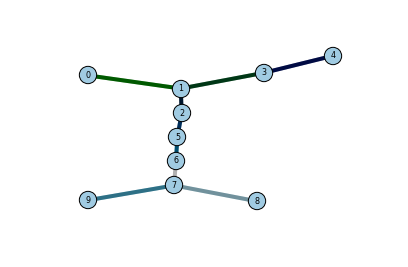

In [76]:


N = shape(conns)[0]
G=nx.Graph()
for k in range(N):
    G.add_edge('%d'%conns[k,0],'%d'%conns[k,1])
#pos=nx.spring_layout(G) # positions for all nodes
# nodes
nx.draw_networkx_nodes(G,pos,node_size=300,node_color = '#A0CBE2', iter=400)
# edges
colors =range(N)
nx.draw_networkx_edges(G,pos,width=4,edge_color=colors,edge_cmap=plt.cm.ocean)
nx.draw_networkx_edges(G,pos,width=4.0,alpha=0.3)
# labels
nx.draw_networkx_labels(G,pos,font_size=8,font_family='sans-serif')
plt.axis('off')
plt.savefig(name+'.png') # save as png
plt.show() # display

In [201]:
for k in range(Np):
    print "%f %f %f"%( maxH[k],min(arrive[k,:]),max(arrive[k,:]))
print "System volume = %f"%(m32gal*np.pi*Ds[0]**2/4.*sum(Ls))
print "inflow volume = %f"%(Vin*m32gal)
print conns


35.413093 55.104000 58.192000
30.251957 65.376000 65.936000
31.511333 43.456000 55.384000
31.481889 43.048000 43.376000
30.276130 65.968000 71.776000
30.329368 72.288000 80.320000
30.399951 80.360000 125.336000
29.458288 124.104000 125.360000
29.458288 124.104000 125.360000
System volume = 373.464367
inflow volume = 385.086592
[[0 1]
 [1 2]
 [1 3]
 [3 4]
 [2 5]
 [5 6]
 [6 7]
 [7 8]
 [7 9]]


In [125]:
A2 = np.ones((N,N))-np.diag(np.ones(N),0)
Gl2  = listRep(A2)
print Gl2
dist = [0]*N
means = []
nmin = 0
nmax = 0
M = 10000
for k in range(M):
    nodeTypes = [4]*N
    while max(nodeTypes)>3 or nodeTypes[0]!=1:
        c2 = randomTreeWithRoot(0,Gl2)
        nl = c2[:,0]
        nr = c2[:,1]
        nodeTypes = [sum(len(find(nl==k))+len(find(nr==k))) for k in range(N)]
    nmin = min(nodeTypes,nmin)
    nmax = max(nodeTypes,nmax)
    for k in range(N):
        dist[k]+= nodeTypes.count(k)
    

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
    

In [126]:
deg  = [dist[k]/(N*float(M)) for k in range(len(dist))]
print deg


[0.0, 0.349025, 0.40195, 0.249025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


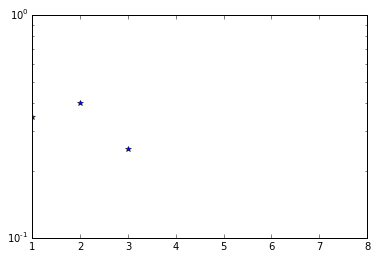

In [127]:
semilogy(range(1,9),deg[1:9],'*')

In [55]:
import time
np.random.seed(555)
Nsamples =100
Summary = []

N = 20

fn = '../indata/randomwithN%d'%N
m32gal = 264.172


#generator = 'wilson' #sample complete graph to get an admissible tree
generator = 'spine'  #start with N-2 pipes comprising 'spine'; pick S random nodes between 1 and N1-1 to add spurs

    
for m in range(Nsamples):
    print "sample # %d\n"%m
    if generator=='wilson':
        print "generating random trees using Wilson's algorithm on complete graph, followed by filter for degree <3"
        Np = N-1
        Nn = N
        Ds = [0.1]*Np
        A2 = np.ones((N,N))-np.diag(np.ones(N),0)
        Gl2  = listRep(A2)
        nodeTypes = [4]*N
        while max(nodeTypes)>3 or nodeTypes[0]!=1:
            conn2 = randomTreeWithRoot(0,Gl2)
            nl = conn2[:,0]
            nr = conn2[:,1]
            nodeTypes = [sum(len(find(nl==k))+len(find(nr==k))) for k in range(N)]
        IN = nodeTypes.index(1)
    
    if generator =='spine':
        S = np.random.randint(0,N/2)
        N1 = N-N/4
        N2 = S
        Np = N1+N2-1
        Nn = N1+N2
        print "generating random trees starting with spine of %d nodes and adding %d branches"%(N1,N2)
        conn2 = np.ndarray((N1+N2-1,2),int)
        for k in range(N1-1):
            conn2[k,:] = (k,k+1)
            avail = [i for i in range(1,N1-1)]
        for k in range(N2):
            where = np.random.randint(0,N1-2-k)
            spur = avail.pop(where)
            conn2[k+N1-1,0]=spur
            conn2[k+N1-1,1] = N1+k
        nl = conn2[:,0]
        nr = conn2[:,1]
        nodeTypes = [sum(len(find(nl==k))+len(find(nr==k))) for k in range(Nn)]
        IN =0
        Ds = [0.1]*(N1-1)+[.1]*N2

    Ls = [20]*Np
    Ns = [Ls[0]]*Np
    Mrs = [0.007]*Np
    h0s = [0.00]*Np
    q0s = [0.00]*Np
    T = 10.
    Mi = 10
    Nt = 2*N+3
    Tmax = Nt*T

    a = 100
    dx = [Ls[i]/Ns[i] for i in range(Np)] 
    M = int(T*a/(max(dx)*.8))

    tol = Ds[0]
    print nodeTypes
    fn = '../indata/randomwithN%d'%N
    jt = nodeTypes
    
    xs = np.random.rand(Nn)
    ys = np.random.rand(Nn)
    #reflect everything
    bt = [1]*Nn
    r = [1]*Nn
    r[IN]=0
    bv = [0.]*Nn
    bv[IN]=0.0087
    elevs = [0]*Nn
    elevs[IN] =.1*Ls[0]


    (fi, fc) = writePipes(fn,conn2, xs,ys, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a, elevs)
    arrive = np.zeros((Np,Ns[0]))
    maxH = np.zeros(Np)
    Vsys = np.pi*Ds[0]**2/4.*sum(Ls)
    print "system volume is %f gal "%(Vsys*m32gal)
    Hs =np.zeros((M/Mi*Nt,sum(Ns)))
    n0=PyNetwork(fi,fc,1)
    
    print n0.Ns

    dt = T/float(M)
    #Q0 = 0.0087*np.ones(M+1)
    #n0.setbVal(0,Q0)
    V0 = n0.getTotalVolume()
    Vin =  0
    Ttot = 0
    count = 0
    t0 = time.clock()
    dH = []
    while count<Nt and Vin<Vsys:
        n0.runForwardProblem(dt)
        Vin  = n0.getTotalVolume()-V0
        for k in range(0,Np):
            for K in range(0,n0.Ns[k]):
                Ht = n0.pressureTimeSeries(k,K)#this function returns H in cell K of pipe k, at each time step
                Hs[count*M/Mi:(count+1)*(M/Mi),K+Ns[0]*k] =Ht[1::Mi] 
                maxH[k] = max(max(Ht),maxH[k])
                where = find(Ht>tol)
                if len(where)>0 and arrive[k,K]==0.:
                    arrive[k,K] = Ttot+dt*(where[0])
        dH.append(mean([n0.getAveGradH(i) for i in range(M+1)]))
        count+=1
        Ttot +=T
        print "T = %f, Volume = %f"%(Ttot, m32gal*Vin)
        n0.reset()
    tf = time.clock()
    print "inflow volume is %f gallons"%(Vin*m32gal)
    print "simulation time is %f s"%Ttot
    print "wall clock time is %f s"%(tf-t0)
    print dH
    print maxH
    print "max arrival time is %f"%(arrive.max())
    data = {}
    data['conn']=conn2
    data['max_arrive_t'] = [max(arrive[k,:]) for k in range(Np)]
    data['min_arrive_t'] = [min(arrive[k,:]) for k in range(Np)]
    data['last_arrive_t'] = arrive.max()
    data['nodeTypes'] = nodeTypes
    data['mean_dH'] = mean(dH)
    data['max_H'] = maxH
    data['Vin'] = Vin

    Summary.append(data)
    

    
    

sample # 0

generating random trees starting with spine of 15 nodes and adding 9 branches
[1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
../indata/fakeinp.inp
system volume is 954.408937 gal 
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
T = 10.000000, Volume = 38.044203
T = 20.000000, Volume = 75.822494
T = 30.000000, Volume = 113.600785
T = 40.000000, Volume = 145.652550
T = 50.000000, Volume = 168.635570
T = 60.000000, Volume = 191.618666
T = 70.000000, Volume = 214.601778
T = 80.000000, Volume = 237.584994
T = 90.000000, Volume = 260.568263
T = 100.000000, Volume = 283.551532
T = 110.000000, Volume = 306.534838
T = 120.000000, Volume = 329.518236
T = 130.000000, Volume = 352.501652
T = 140.000000, Volume = 375.485070
T = 150.000000, Volume = 398.468489
T = 160.000000, Volume = 421.451940
T = 170.000000, Volume = 444.435392
T = 180.000000, Volume = 467.418834
T = 190.000000, Volume = 490.402390
T = 200.000000, Volume = 513.385983
T 

In [56]:

print "max(T_a)  mean(max(H))  mean(dH)   %junction1s %junction2s   %junction3s"
for k in range(len(Summary)):
    c = [Summary[k]['nodeTypes'].count(j) for j in range(1,4)]
    print"%3.2f    %2.6f     %3.6f   %.2f          %.2f               %.2f"%(Summary[k]['last_arrive_t'],\
                                         mean(Summary[k]['max_H']),Summary[k]['mean_dH'],c[0]/float(N), c[1]/float(N),c[2]/float(N))

max(T_a)  mean(max(H))  mean(dH)   %junction1s %junction2s   %junction3s
398.02    30.004656     5.091846   0.55          0.20               0.45
190.65    19.358767     58.896550   0.10          0.65               0.00
329.50    19.700670     4.604836   0.40          0.35               0.30
338.15    18.609471     4.453651   0.40          0.35               0.30
209.75    16.102237     53.307732   0.15          0.60               0.05
254.59    26.340505     3.807666   0.20          0.55               0.10
369.47    27.093008     4.915356   0.50          0.25               0.40
286.42    21.149286     3.775584   0.25          0.50               0.15
190.65    19.358767     58.896550   0.10          0.65               0.00
349.09    22.672506     4.994047   0.45          0.30               0.35
331.36    18.048699     5.004291   0.45          0.30               0.35
286.47    21.160826     3.737751   0.25          0.50               0.15
373.19    25.097483     4.655837   0.55         

9


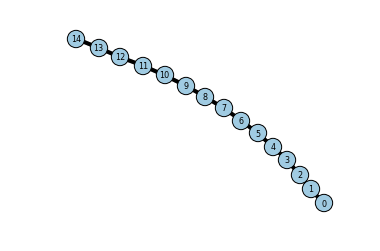

In [59]:
which = 1
conns = Summary[which]['conn']
import networkx as nx
from networkx import graphviz_layout
G=nx.Graph()
Dpos = {}
for k in range(len(Summary[which]['nodeTypes'])-1):
    G.add_edge('%d'%conns[k,0],'%d'%conns[k,1])
pos=nx.spring_layout(G) # positions for all nodes
pos=nx.graphviz_layout(G,root=0)
# nodes
nx.draw_networkx_nodes(G,pos,node_size=300,node_color = '#A0CBE2', iter=100)
# edges
nx.draw_networkx_edges(G,pos,width=4,edge_cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(G,pos,width=4.0,alpha=0.3)
# labels
nx.draw_networkx_labels(G,pos,font_size=8,font_family='sans-serif')
plt.axis('off')
print Summary[0]['nodeTypes'].count(3)


In [177]:
c3 = [np.array([[0,1],[1,2],[6,3],[3,4],[2,5],[8,6],[6,7],[5,8],[5,9]]),
                np.array([[0,1],[1,2],[2,3],[2,4],[4,5],[3,6],[5,7],[1,8],[8,9]]),
                np.array([[0,1],[1,2],[5,3],[3,4],[2,5],[3,6],[2,7],[7,8],[8,9]]),
                np.array([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9]]),
                np.array([[0,1],[3,2],[1,3],[7,4],[2,5],[8,6],[6,7],[5,8],[7,9]]),
                np.array([[0,1],[6,2],[4,3],[6,4],[1,5],[5,6],[9,7],[2,8],[8,9]]),
                np.array([[0,1],[1,2],[1,3],[3,4],[2,5],[5,6],[6,7],[7,8],[7,9]])]
for k in range(6):
    conns = c3[k]
    nl = conns[:,0]
    nr = conns[:,1]
    nodeTypes = [sum(len(find(nl==k))+len(find(nr==k))) for k in range(N)]
    #print nodeTypes


In [20]:
counts = [0]*3
for k in range(100):
    for j in range(1,4):
        counts[j-1]+=Summary[k]['nodeTypes'].count(j) 
print counts

[401, 398, 201]


In [36]:
import pickle

In [60]:
#generator = 'wilson'
name = "output_data/random_networks/summary_N%d_samples%d_%s_variable_spurs"%(N,Nsamples,generator)
#name = "output_data/random_networks/summary_N%d_samples%d_%s"%(N,Nsamples,generator)
f1 = open(name+'.pkl','wb')
pickle.dump(Summary,f1)
f1.close()

In [61]:
with open(name+'.txt','w') as f2:
    f2.write("max(T_a)  mean(max(H))  mean(dH)   %junction1s %junction2s   %junction3s\n")
    for k in range(len(Summary)):
        c = [Summary[k]['nodeTypes'].count(j) for j in range(1,4)]
        f2.write("%3.2f    %2.6f     %3.6f   %.2f          %.2f               %.2f\n"%(Summary[k]['last_arrive_t'],\
                                         mean(Summary[k]['max_H']),Summary[k]['mean_dH'],c[0]/float(N), c[1]/float(N),c[2]/float(N)))

In [63]:
name = "output_data/random_networks/summary_N%d_samples%d_%s_variable_spurs"%(N,Nsamples,generator)
print name

output_data/random_networks/summary_N20_samples100_spine_variable_spurs


[1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 2, 3, 3, 3, 1, 3, 2, 1, 3, 1]


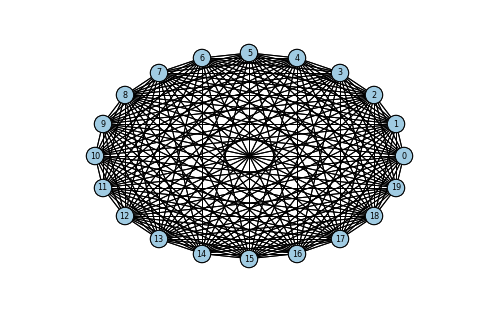

In [146]:
G = nx.Graph(A2)
#pos=nx.spectral_layout(G) # positions for all nodes
# nodes
nx.draw_circular(G,node_size=300,node_color = '#A0CBE2')
pos=nx.circular_layout(G) # positions for all nodes
# nodes
nx.draw_networkx_nodes(G,pos,node_size=300,node_color = '#A0CBE2', iter=300)
# edges
nx.draw_networkx_edges(G,pos,width=1,edge_cmap=plt.cm.coolwarm)
# labels
nx.draw_networkx_labels(G,pos,font_size=8,font_family='sans-serif')
plt.axis('off')
print Summary[0]['nodeTypes']

In [52]:
print Summary[1]

{'mean_dH': 58.896549754611179, 'Vin': 2.199450277223604, 'max_H': array([ 113.01333586,   11.38314344,   11.61568269,   11.80709035,
         12.06557722,   12.20831332,   12.3132504 ,   12.31435275,
         12.39691881,   12.40120213,   12.36643296,   12.33271988,
         12.37653675,   12.42818228]), 'last_arrive_t': 190.648, 'conn': array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14]]), 'max_arrive_t': [190.44, 42.335999999999999, 35.287999999999997, 46.68, 59.456000000000003, 70.656000000000006, 84.584000000000003, 97.951999999999998, 113.84, 131.40799999999999, 147.816, 163.82400000000001, 183.304, 190.648], 'nodeTypes': [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1], 'min_arrive_t': [44.280000000000001, 26.192, 25.84, 35.335999999999999, 46.712000000000003, 59.496000000000002, 70.671999999999997,